In [96]:
# Import necessary libraries
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
import enum


class Strategy(str, enum.Enum):
    STAY = "stay"
    SWITCH = "switch"
    RANDOM = "random"


def monty_hall_simulation(strategy: Strategy, n_simulations: int):
    """
    Simulate the Monty Hall problem.

    Parameters:
    - strategy: 'stay', 'switch', or 'random'
    - n_simulations: number of times to run the simulation

    Returns:
    - Number of wins
    """
    wins = 0

    for _ in range(n_simulations):
        # Randomly place the car behind one of the three doors
        doors = [0, 1, 2]
        car = np.random.choice(doors)

        # Contestant makes an initial choice
        player_choice = np.random.choice(doors)

        # Host opens a door that is neither the car nor the player's choice
        remaining_doors = [
            door for door in doors if door != player_choice and door != car
        ]
        if remaining_doors:
            host_opens = np.random.choice(remaining_doors)
        else:
            # If player's choice is the car, host opens a random other door
            host_opens = np.random.choice(
                [door for door in doors if door != player_choice]
            )

        # Depending on the strategy, the player may switch
        if strategy == Strategy.STAY:
            final_choice = player_choice
        elif strategy == Strategy.SWITCH:
            # Switch to the other unopened door
            final_choice = [
                door for door in doors if door != player_choice and door != host_opens
            ][0]
        elif strategy == Strategy.RANDOM:
            # Randomly decide whether to stay or switch
            if np.random.rand() > 0.5:
                final_choice = player_choice
            else:
                final_choice = [
                    door
                    for door in doors
                    if door != player_choice and door != host_opens
                ][0]
        else:
            raise ValueError("Invalid strategy. Choose 'stay', 'switch', or 'random'.")

        # Check if the player wins
        if final_choice == car:
            wins += 1

    return wins


In [93]:
# Number of simulations
from typing import Any


n_simulations = 10000

# Strategies to test
strategies = [choice for choice in Strategy]

# Run simulations and store results
results: list[dict[str, Any]] = []

for strategy in strategies:
    wins = monty_hall_simulation(strategy, n_simulations)
    win_rate = wins / n_simulations
    results.append({"Strategy": strategy, "Wins": wins, "Win Rate": win_rate})

# Convert results to a Polars DataFrame
schema: dict[str, pl.DataType] = {
    "Strategy": pl.Categorical,
    "Wins": pl.Int16,
    "Win Rate": pl.Float32,
}  # type: ignore
df_results = pl.DataFrame(results, schema=schema)


In [94]:
print(df_results)


shape: (3, 3)
┌──────────┬──────┬──────────┐
│ Strategy ┆ Wins ┆ Win Rate │
│ ---      ┆ ---  ┆ ---      │
│ cat      ┆ i16  ┆ f32      │
╞══════════╪══════╪══════════╡
│ stay     ┆ 3332 ┆ 0.3332   │
│ switch   ┆ 6629 ┆ 0.6629   │
│ random   ┆ 4984 ┆ 0.4984   │
└──────────┴──────┴──────────┘


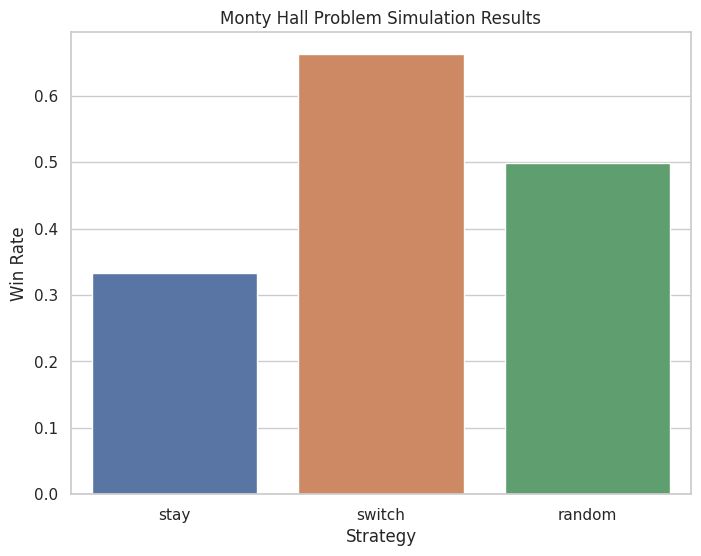

In [95]:
# Set up the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_results.to_pandas(),
    x="Strategy",
    y="Win Rate",
    hue="Strategy",
)
# Add title and labels
plt.title("Monty Hall Problem Simulation Results")
plt.ylabel("Win Rate")
plt.xlabel("Strategy")

# Show the plot
plt.show()
